<h1 align="center">Take Home Assignment 2</h1>

### Name     :   Sabaragamuwa S.B.N.M.
### Index No :    EG/2018/3443

In [339]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



#### 1. Consider an image with 2 objects and a total of 3-pixel values (1 for each object and one for the background). Add Gaussian noise to the image. Implement and test Otsu’s algorithm with this image.

In [340]:
# Create a 2-object image with background
originalImg = np.zeros((256, 256), dtype=np.uint8)
originalImg[50:150, 50:150] = 1
originalImg[100:200, 100:200] = 2


In [341]:
# Add Gaussian noise to the image
x, y = originalImg.shape
mean = 0
var = 0.01
sigma = np.sqrt(var)
gaussianNoise = np.random.normal(loc=mean, scale=sigma, size=(x,y))

In [342]:
# add noise to the image
noisyImage = originalImg + gaussianNoise


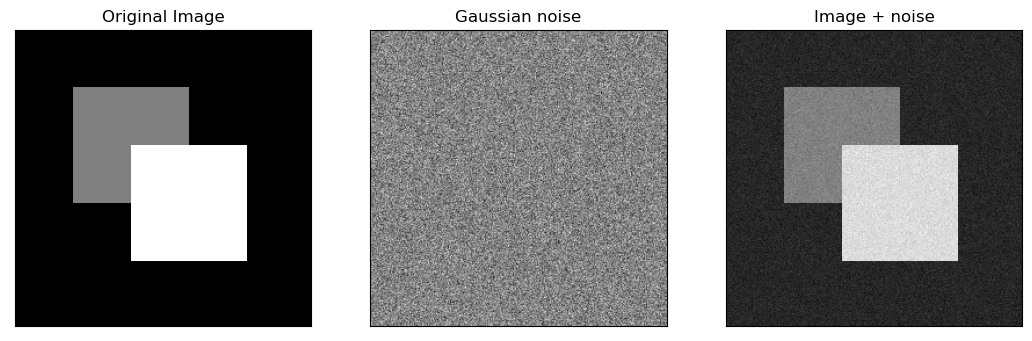

In [343]:
# display all
plt.figure(figsize=(13, 8))
plt.subplot(131),plt.imshow(originalImg, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gaussianNoise, cmap='gray')
plt.title('Gaussian noise'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(noisyImage, cmap='gray')
plt.title('Image + noise'), plt.xticks([]), plt.yticks([])
plt.show()


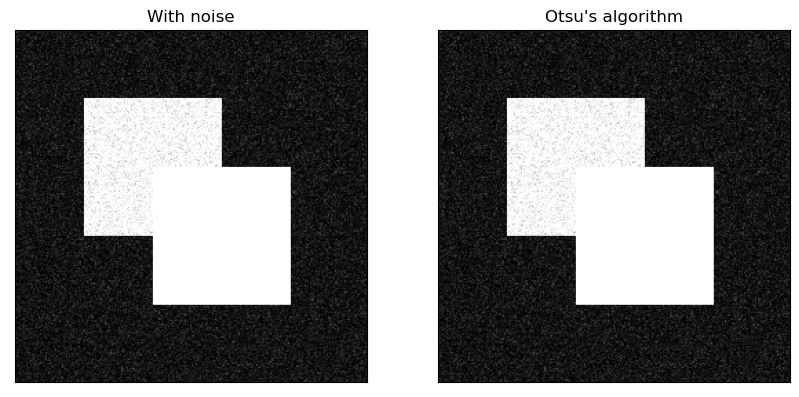

In [344]:
# Otsu's thresholding using OpenCV

img = cv2.convertScaleAbs(noisyImage, alpha=(255.0))

r1,t1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


plt.figure(figsize=(10, 8))
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('With noise'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(img, cmap='gray')
plt.title("Otsu's algorithm"), plt.xticks([]), plt.yticks([])
plt.show()

In [345]:
# otsu thresholding python implementation
def otsu_threshold(img):
    histg = cv2.calcHist([img],[0],None,[255],[0,255])
    within = []
    between = []
    d = 0
    for i in range(len(histg)):
        x,y =  np.split(histg,[i])
        x1 = np.sum(x)/(img.shape[0]*img.shape[1])
        y1 = np.sum(y)/(img.shape[0]*img.shape[1])

        if np.sum(x) == 0:
            x2 = 0
        else:
            x2 = np.sum([j*t for j,t in enumerate(x)])/np.sum(x)

        x2 = np.nan_to_num(x2)
        y2 = np.sum([(j+d)*t for j,t in enumerate(y)])/np.sum(y)

        if np.sum(x) == 0:
            x3 = 0
        else:
            x3 = np.sum([(j-x2)**2*t for j,t in enumerate(x)])/np.sum(x)
            
        x3 = np.nan_to_num(x3)
        y3 = np.sum([((j+d)-y2)**2*t for j,t in enumerate(y)])/np.sum(y)
        d = d + 1
        within.append(x1*x3 + y1*y3)
        between.append(x1*y1*(x2-y2)*(x2-y2))

    m = np.argmin(within)    
    n = np.argmax(between)
    return n 

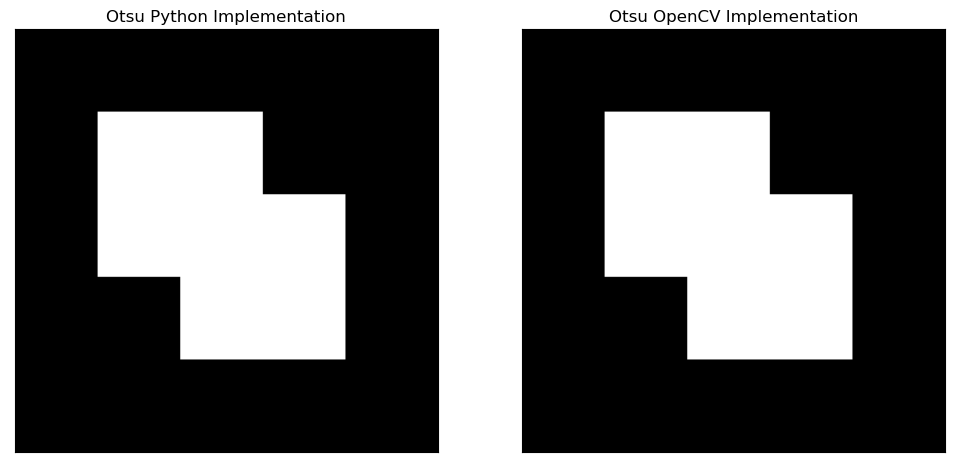

In [346]:
n = otsu_threshold(img)
(thresh, Bin) = cv2.threshold(img, n, 255, cv2.THRESH_BINARY )


plt.figure(figsize=(12, 8))
plt.subplot(121),plt.imshow(Bin, cmap='gray')
plt.title("Otsu Python Implementation"), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(t1, cmap='gray')
plt.title("Otsu OpenCV Implementation"), plt.xticks([]), plt.yticks([])
plt.show()

#### 2. Implement a region-growing technique for image segmentation. The basic idea is to startfrom a set of points inside the object of interest (foreground), denoted as seeds, and recursively add neighboring pixels as long as they are in a pre-defined range of the pixel values of the seeds.

In [347]:
seeds = []

In [348]:
# Mouse callback function
def mouseCallback(event, x, y, flags, userdata):
    if event == cv2.EVENT_LBUTTONDOWN:
        seeds.append((x, y))
        image = userdata
        colour = (0, 0, 255)
        cv2.circle(image, (x, y), 4, colour, cv2.FILLED)
        cv2.imshow("Click on Seeds", image)

In [349]:
# Load the image
img = cv2.imread('CT.jpg',0)
color_image = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

cv2.namedWindow("Click on Seeds", cv2.WINDOW_AUTOSIZE)  
cv2.imshow("Click on Seeds", color_image)  
cv2.setMouseCallback("Click on Seeds", mouseCallback, color_image)  
cv2.waitKey(0)
cv2.destroyAllWindows()

In [350]:
def grow_region(im, seeds, val=255, t=20):

    point_list = seeds.copy()
    visited_matrix = np.zeros((im.shape[0], im.shape[1]), dtype=np.uint8)

    while len(point_list) > 0:

        pointer = point_list.pop()
        x = pointer[0]  
        y = pointer[1]
      
        pix = im[y, x]

        visited_matrix[y, x] = val
  
        for j in range(y - 1, y + 2):
            if 0 <= j < im.shape[0]:
                for i in range(x - 1, x + 2):
                    if 0 <= i < im.shape[1]:
                        neighbour_val = im[j, i]
                        neighbour_vis = visited_matrix[j, i]
                        if (not neighbour_vis) and (abs(int(neighbour_val) - int(pix)) <= ((t / 100.0) * 255.0)): 

                            point_list.append((i, j))
                        
    return visited_matrix

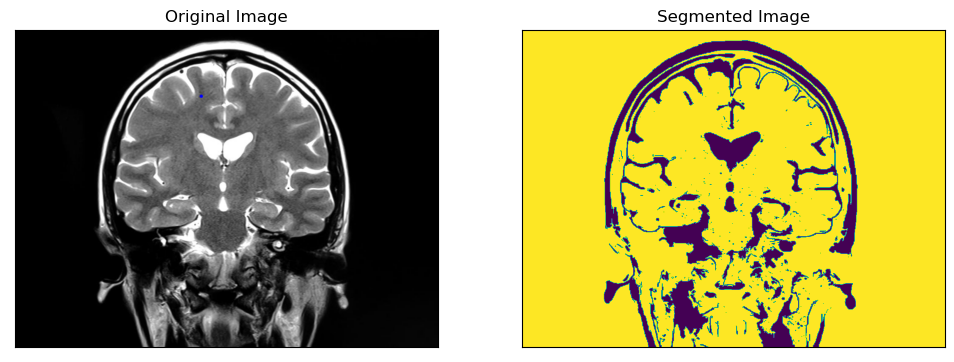

In [351]:
segmented = grow_region(img, seeds,255, 2)

# Display the original image and the segmented image

plt.figure(figsize=(12, 8))
plt.subplot(121),plt.imshow(color_image, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(segmented)
plt.title("Segmented Image"), plt.xticks([]), plt.yticks([])
plt.show()